<a href="https://colab.research.google.com/github/valenvergara25/Valentina-Vergara-ModelosPredictivos/blob/main/semana2/Copia_de_Taller_Forecasting_Ocupacion_ValentinaVergara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Cargar dataset de ocupacion de sitios de parqueo
dataPark = pd.read_csv('/content/SJ.csv')

In [16]:
# Revisar cabecera y cola del dataset
dataPark.head()
dataPark.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [17]:
# Formatear la columna de fecha como año y mes
dataPark['date'] = pd.to_datetime(dataPark['date'], format = '%Y-%m')

In [18]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
dataPark.head(6)

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665
5,2023-01-01,1,116672


In [19]:
# Contar el numero de datos del dataset
dataPark.count()

,0
date,18
idCompany,18
numTrx,18


In [20]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
dataPark.describe()
#la desviación estándar de numTrx es significativa en comparación con la media, Hay una dispersion considerable entre los datos.

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [21]:
# Revisar si el ldataset tiene datos nullos
dataPark.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [22]:
# Establecer el campo fecha como index del dataframe
dataPark.set_index('date', inplace = True)

In [23]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
dataPark.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

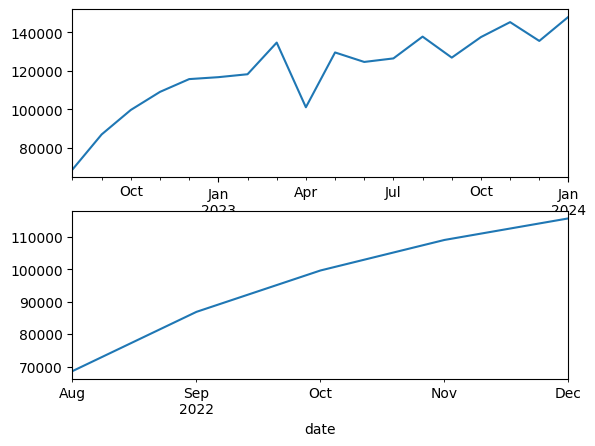

In [24]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
plt.subplot(2,1,1)
dataPark.numTrx.plot(style='-')
plt.subplot(2,1,2)
dataPark['2022-08-01':'2022-12-01'].numTrx.plot(style='-')

In [25]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
dataPark = dataPark.drop(labels=['idCompany'], axis = 1)
dataPark.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [26]:
# Escalar entre -1 y 1 los datos de la variable a predecir
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(-1,1))
dataPark_arr = scalar.fit_transform(dataPark)

dataPark_arr #Entradas de la red

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [27]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento
steps = 11
xTrain = []
yTrain = []

for i in range(len(dataPark_arr) - steps):
  xTrain.append(dataPark_arr[i:i+steps])
  yTrain.append(dataPark_arr[i+steps])

In [28]:
# Convertir las listas en arrays de numpy
xTrain = np.asanyarray(xTrain)
yTrain = np.asanyarray(yTrain)

In [29]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print(xTrain.shape, yTrain.shape)

(7, 11, 1) (7, 1)


In [30]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
#Arquitectura de la red neuronal
model = Sequential()

# Una capa LSTM de 256 neuronas con activación relu
model.add(LSTM(units = 256, return_sequences = True, activation = 'relu', input_shape = (11,1)))
model.add(Dropout(0.07))
# Una capa LSTM de 256 neuronas con activación relu
model.add(LSTM(units = 256, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 128 neuronas con activación relu
model.add(LSTM(units = 128, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 64 neuronas con activación relu
model.add(LSTM(units = 64, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 32 neuronas con activación relu
model.add(LSTM(units = 32, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
model.add(LSTM(units = 16, return_sequences = False, activation = 'relu'))
model.add(Dropout(0.07))
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
model.add(Dense(64))
model.add(Dense(32))
# Finalmente agregar una capa densa de salida
model.add(Dense(1))
# Imprimir el summary del  modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 11, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 11, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 11, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 11, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 11, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,054,785 (4.02 MB)

 Trainable params: 1,054,785 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(loss='mse', optimizer='adam')

In [32]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16
history = model.fit(xTrain, yTrain, epochs = 100, validation_split = 0.1, batch_size = 16, verbose = 1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.4739 - val_loss: 0.9567
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.4449 - val_loss: 0.9121
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.4157 - val_loss: 0.8666
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3861 - val_loss: 0.8195
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.3564 - val_loss: 0.7712
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 0.3259 - val_loss: 0.7216
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.2973 - val_loss: 0.6704
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.2639 - val_loss: 0.6175
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2342 - val_loss: 0.5627
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.2015 - val_loss: 0.5063
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.1710 - val_loss: 0.4479
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 0.14

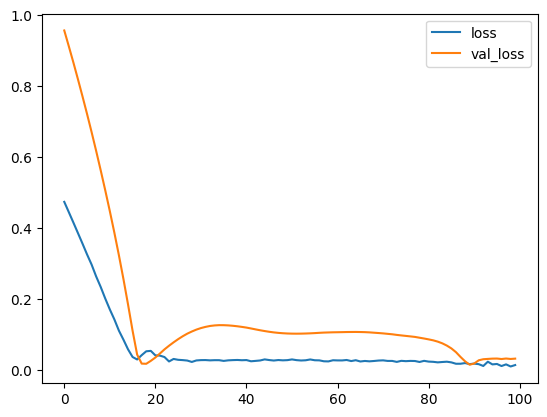

In [33]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [34]:
# Guardar el modelo y salvarlo en disco
model.save('forecast_ValentinaVergara.h5')

In [36]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
N = 10
mes_prediccion = '2024-02-01'
dataN = dataPark[-N:]
dataN_arr = scalar.transform(dataN)
xTest = np.array([dataN_arr])
yPred = model.predict(xTest)
yPred_original = scalar.inverse_transform(yPred)

print(f"Predicción de ocupación para {mes_prediccion}: {yPred_original[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicción de ocupación para 2024-02-01: 137425.265625


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción